In [2]:
import numpy as np

def euler_to_rot_matrix(angles):
    # Convert degrees to radians
    angles = np.deg2rad(angles)
    theta_x, theta_y, theta_z = angles

    # Rotation matrix around x-axis
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(theta_x), -np.sin(theta_x)],
        [0, np.sin(theta_x), np.cos(theta_x)]
    ])

    # Rotation matrix around y-axis
    Ry = np.array([
        [np.cos(theta_y), 0, np.sin(theta_y)],
        [0, 1, 0],
        [-np.sin(theta_y), 0, np.cos(theta_y)]
    ])

    # Rotation matrix around z-axis
    Rz = np.array([
        [np.cos(theta_z), -np.sin(theta_z), 0],
        [np.sin(theta_z), np.cos(theta_z), 0],
        [0, 0, 1]
    ])

    # Combined rotation matrix (assuming XYZ rotation order)
    R = Rz @ Ry @ Rx
    return R

def rot_matrix_to_euler(R):
    theta_y = np.arcsin(R[0,2])
    theta_x = np.arctan2(-R[1,2], R[2,2])
    theta_z = np.arctan2(-R[0,1], R[0,0])
    
    # Convert radians to degrees
    return np.rad2deg([theta_x, theta_y, theta_z])

def main():
    translation = np.array([0.024186, 0.062552, -0.642500])
    rotation = np.array([88.15, 22.79, 20.34])
    # Invert the translation
    inverted_translation = -translation
    
    # Get the rotation matrix
    R = euler_to_rot_matrix(rotation)
    
    # Invert the rotation matrix
    R_inv = np.transpose(R)
    
    # Convert the inverted rotation matrix back to Euler angles
    inverted_rotation = rot_matrix_to_euler(R_inv)
    
    print("Inverted Translation:", inverted_translation)
    print("Inverted Rotation (degrees):", inverted_rotation)

if __name__ == "__main__":
    main()


Inverted Translation: [-0.024186 -0.062552  0.6425  ]
Inverted Rotation (degrees): [-88.15 -22.79 -20.34]


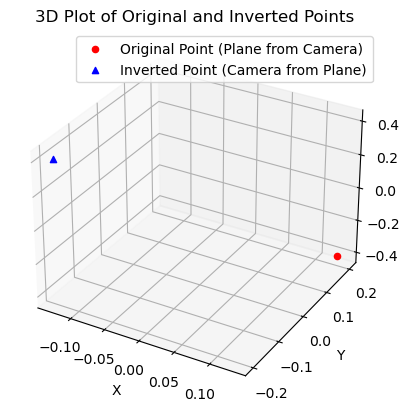

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    translation = np.array([0.130269, 0.200321, -0.406250])
    inverted_translation = -translation
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the original and inverted points
    ax.scatter(*translation, c='r', marker='o', label="Original Point (Plane from Camera)")
    ax.scatter(*inverted_translation, c='b', marker='^', label="Inverted Point (Camera from Plane)")

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.title("3D Plot of Original and Inverted Points")
    plt.show()

if __name__ == "__main__":
    main()